In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import bartlett

In [12]:
import os
os.chdir(r"C:\A_A\Excel\Datasets")

In [13]:
car93 = pd.read_csv("Cars93.csv")

In [14]:
print(car93.shape)

(93, 26)


In [15]:
print(car93.mean())

Min.Price               17.125806
Price                   19.509677
Max.Price               21.898925
MPG.city                22.365591
MPG.highway             29.086022
EngineSize               2.667742
Horsepower             143.827957
RPM                   5280.645161
Rev.per.mile          2332.204301
Fuel.tank.capacity      16.664516
Passengers               5.086022
Length                 183.204301
Wheelbase              103.946237
Width                   69.376344
Turn.circle             38.956989
Rear.seat.room          27.829670
Luggage.room            13.890244
Weight                3072.903226
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_3216\167127188.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(car93.mean())


In [16]:
print(car93.columns)

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin'],
      dtype='object')


In [17]:
print(car93.dtypes)

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
dtype: object


In [18]:
car93['Price'].mean()

19.509677419354837

In [19]:
car93['Price'].median()

17.7

In [20]:
car93['Price'].quantile()

17.7

In [21]:
car93['Price'].quantile(q=0.25)

12.2

In [22]:
car93['Price'].quantile(q=0.75)

23.3

In [23]:
car93['Price'].quantile(q=np.array([0.25,0.5,0.75]))

0.25    12.2
0.50    17.7
0.75    23.3
Name: Price, dtype: float64

<AxesSubplot:>

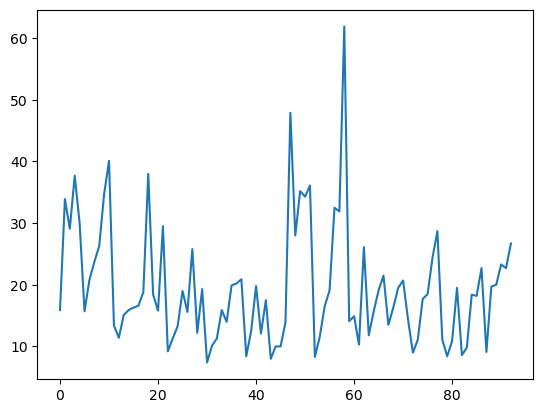

In [24]:
car93['Price'].plot(kind='line')

<AxesSubplot:>

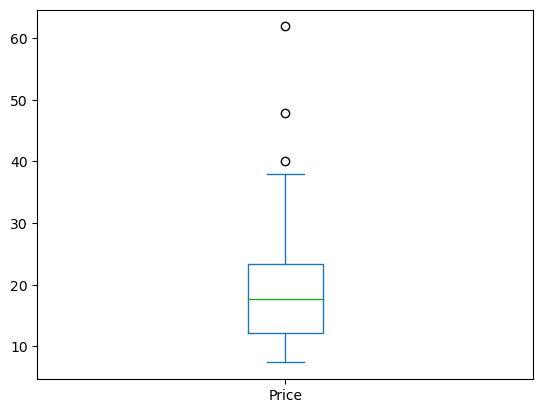

In [25]:
car93['Price'].plot(kind='box')

In [26]:
plt.show()

In [27]:
variance = car93['Price'].var()
variance

93.30457924263672

In [28]:
std = car93['Price'].std()
std

9.659429550580962

In [29]:
9.659429550580962**2

93.30457924263672

In [30]:
mean = car93['Price'].mean()
mean

19.509677419354837

In [31]:
cv = std/mean*100
cv

49.51096495833496

In [32]:
cv = std/mean
cv

0.4951096495833496

In [33]:
car93['Price'].skew()

1.53308185621344

In [34]:
skew(car93['Price'])

1.508243103747759

In [35]:
car93['Price'].kurtosis()

3.429122585617559

In [36]:
kurtosis(car93['Price'], fisher=True)

3.1836857049268987

In [37]:
car93['Price'].kurtosis()

3.429122585617559

<AxesSubplot:>

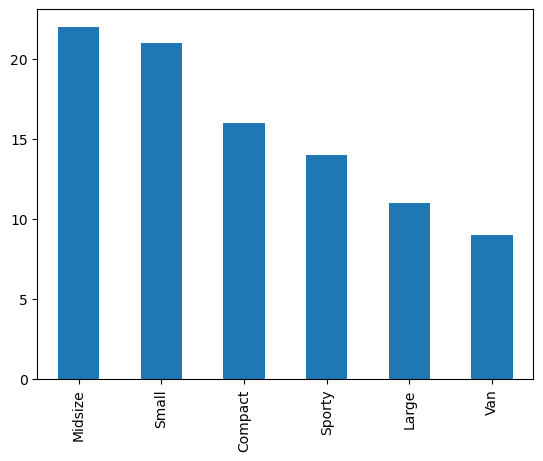

In [38]:
car93['Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

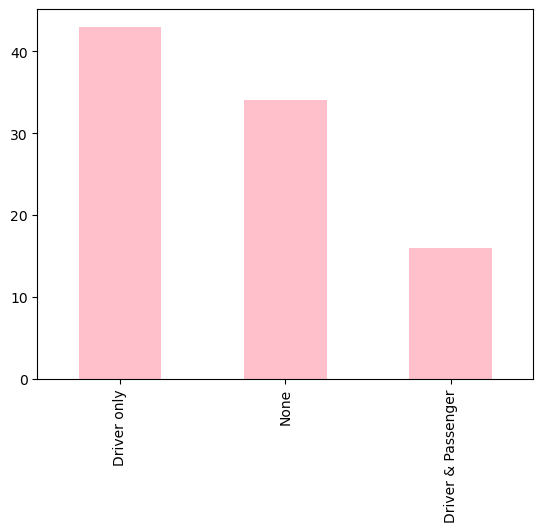

In [39]:
car93['AirBags'].value_counts().plot(kind='bar',color='pink')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

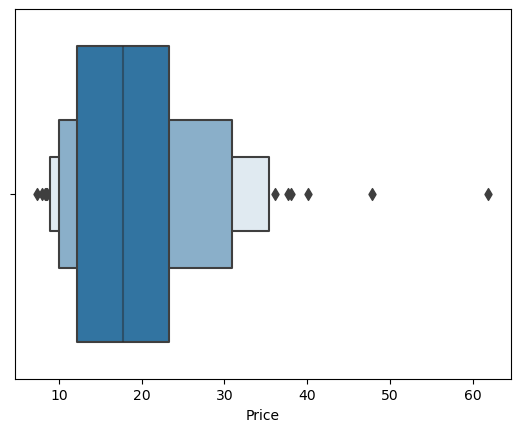

In [40]:
sns.boxenplot(car93['Price'])

<AxesSubplot:ylabel='Frequency'>

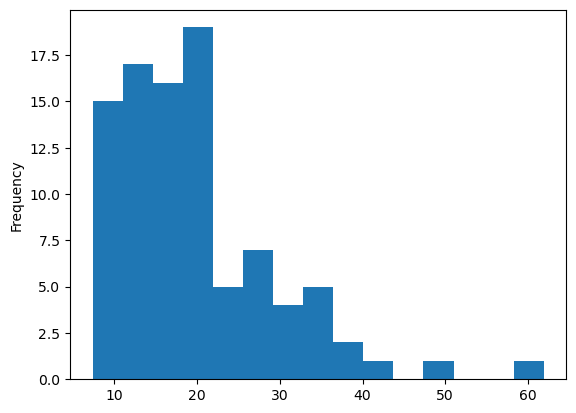

In [41]:
car93['Price'].plot(kind='hist',bins=15)

<AxesSubplot:ylabel='Frequency'>

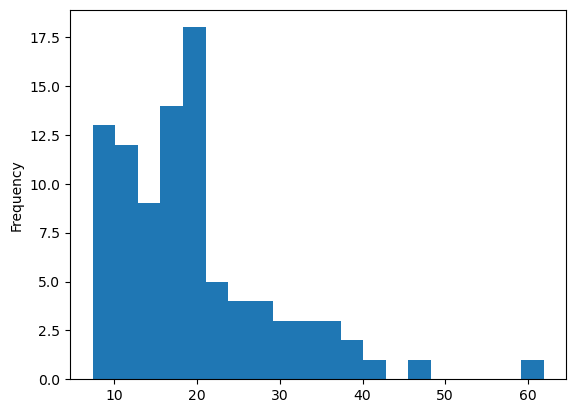

In [42]:
car93['Price'].plot(kind='hist',bins=20)

<AxesSubplot:xlabel='Price', ylabel='Count'>

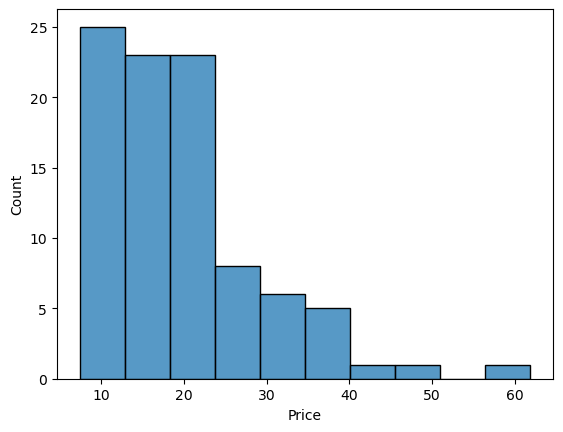

In [43]:
sns.histplot(data=car93,x='Price',bins=10)

<AxesSubplot:xlabel='Price', ylabel='Count'>

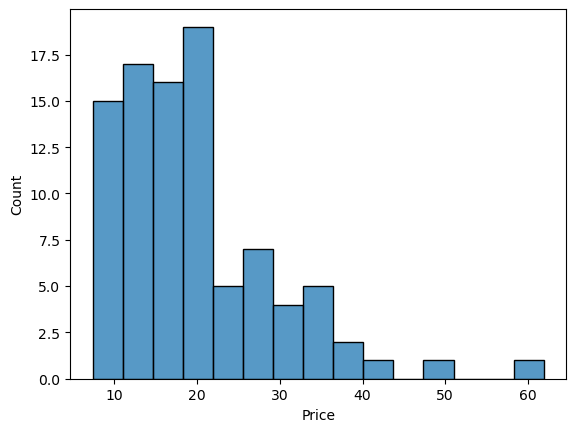

In [44]:
sns.histplot(data=car93,x='Price',bins=15)

<AxesSubplot:xlabel='Price', ylabel='Count'>

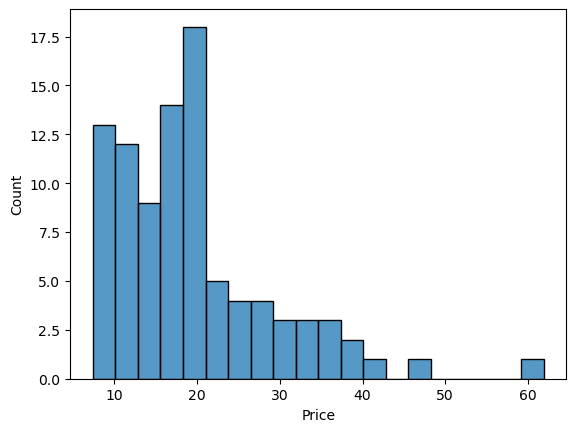

In [45]:
sns.histplot(data=car93,x='Price',bins=20)

## ttest ############################

In [46]:
car = pd.read_csv("Cars93.csv")
car.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [47]:
car['Origin'].unique()

array(['non-USA', 'USA'], dtype=object)

In [48]:
US = car[car['Origin']=='USA']
NUS = car[car['Origin']=='non-USA']

In [49]:
bartlett(US['Price'],NUS['Price'])

BartlettResult(statistic=6.0382009476180585, pvalue=0.01399954338801128)

In [50]:
ttest_ind(US['Price'],NUS['Price'],alternative='greater',equal_var=False)

Ttest_indResult(statistic=-0.9544860372166483, pvalue=0.8286004805045648)

In [51]:
ttest_ind(US['Price'],NUS['Price'],alternative='less',equal_var=False)

Ttest_indResult(statistic=-0.9544860372166483, pvalue=0.17139951949543525)

In [52]:
ttest_ind(US['Price'],NUS['Price'],equal_var=False)

Ttest_indResult(statistic=-0.9544860372166483, pvalue=0.3427990389908705)

In [53]:
car.groupby('Origin')['Price'].mean()

Origin
USA        18.572917
non-USA    20.508889
Name: Price, dtype: float64

In [54]:
car.groupby('Origin')['Price'].var()

Origin
USA         61.104145
non-USA    127.842646
Name: Price, dtype: float64

In [55]:
car.groupby('Origin')['Price'].std()

Origin
USA         7.816914
non-USA    11.306752
Name: Price, dtype: float64

In [56]:
car['Man.trans.avail'].unique()

array(['Yes', 'No'], dtype=object)

In [57]:
car.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin'],
      dtype='object')

In [58]:
car.groupby('Man.trans.avail')['Price'].mean()

Man.trans.avail
No     23.840625
Yes    17.237705
Name: Price, dtype: float64

In [59]:
#car['Man.trans.avail'].value_counts
car.groupby('Man.trans.avail')['Price'].var()
#car.groupby('Man.trans.avail')['Price'].std()

Man.trans.avail
No     114.099909
Yes     68.863721
Name: Price, dtype: float64

In [60]:
# Y1 = car[car['Man.trans.avail']=='Y']
# N1 = car[car['Man.trans.avail']=='N']

In [61]:
# bartlett(Y['Price'],N['Price'])

In [62]:
# ttest_ind(Y['Price'],N['Price'],alternative='greater',equal_var=False)

In [72]:
from scipy.stats import chi2_contingency

In [69]:
car['Type'].unique()

array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [70]:
car['AirBags'].unique()

array(['None', 'Driver & Passenger', 'Driver only'], dtype=object)

In [71]:
car['DriveTrain'].unique()

array(['Front', 'Rear', '4WD'], dtype=object)

In [ ]:
# Is Price influenced by Type

